In [6]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from netcdftools import MyNetCDF
from models import Fitter

In [7]:
def load_file(filepath):
    ds = pd.read_csv(filepath, sep='\t')
    ds.set_index(pd.to_datetime(ds['Date'], format='%Y-%m-%d'), inplace=True)
    ds.drop('Date', inplace=True, axis=1)
    
    return ds

def continious_check(ds):
    idx = pd.date_range(start=ds.index[0],
                        end=ds.index[0] + pd.offsets.YearEnd(),
                        freq='D')
    try:
        ds = ds.reindex(idx, fill_value=np.nan)
        ds.fillna(method='ffill', inplace=True)
    except:
        # if no gaps in data
        pass
    
    return ds

def velocity_module(x): # simple function to convert UV velocity to velocity module
    return np.sqrt(x[0] ** 2 + x[1] ** 2)

In [8]:
ds_train = load_file('data_daily-16.csv')
ds_test = load_file('data_daily-17.csv')

target_var = 'iceconc'
ice_var_list = ['ice_volume', 'iceconc', 'icethic_cea', 'siconcat','sithicat', 'snowthic_cea']
model_var_list = ['SSH', 'SST', 'salinity', 'UV']

* временное осреднение
* пространственное осреднение
* регрессия по предыдущим значениям
* авторегрессия по прошлым значениям
* регрессия по полям

посмотреть ограничение на мнк меньше единицы

In [9]:
fitter = Fitter(ds_train, ds_test)
fitter.define_target(target_var, ice_var_list)
fitter.linear_regression_prediction()
fitter.mean_squared_error()

0.02527178109957161

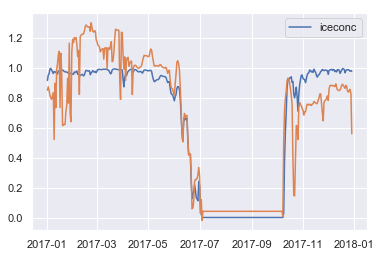

In [10]:
sns.set(style="darkgrid")

sns.lineplot(data=[fitter.y_test])
sns.lineplot(data=[fitter.prediction])